In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [59]:
import io

In [60]:
from google.colab import files
uploaded = files.upload()

Saving ERIE.csv to ERIE.csv


In [61]:
df = pd.read_csv(io.BytesIO(uploaded['ERIE.csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close
0     2/8/2023  245.800003  248.119995  244.919998  245.600006  241.040756
1     2/9/2023  246.899994  248.039993  238.699997  238.699997  234.268860
2    2/10/2023  239.869995  242.009995  237.660004  240.970001  236.496719
3    2/13/2023  241.050003  245.970001  240.389999  243.860001  239.333069
4    2/14/2023  243.050003  244.800003  236.919998  238.160004  233.738892
..         ...         ...         ...         ...         ...         ...
246   2/1/2024  343.630005  346.989990  337.579987  346.989990  346.989990
247   2/2/2024  347.519989  348.829987  339.779999  347.390015  347.390015
248   2/5/2024  346.359985  346.570007  343.160004  343.609985  343.609985
249   2/6/2024  344.989990  348.339996  343.750000  347.489990  347.489990
250   2/7/2024  348.079987  350.630005  346.070007  350.000000  350.000000

[251 rows x 6 columns]


In [62]:
data_training = df[df['Date'] < '2020-03-15'].copy()
data_testing = df[df['Date'] >= '2020-03-15'].copy()

In [63]:
data_training = data_training.drop(['Date'], axis = 1)

In [64]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[9.47872188e-02, 1.00394917e-01, 1.00808921e-01, 9.02753699e-02,
        8.53516463e-02],
       [1.04522515e-01, 9.96928372e-02, 4.55151104e-02, 3.01498096e-02,
        2.85055881e-02],
       [4.23046232e-02, 4.67749139e-02, 3.62699068e-02, 4.99302566e-02,
        4.72071456e-02],
       [5.27480970e-02, 8.15270471e-02, 6.05386852e-02, 7.51132483e-02,
        7.10166248e-02],
       [7.04487798e-02, 7.12594045e-02, 2.96914913e-02, 2.54443981e-02,
        2.40568205e-02],
       [1.34525632e-02, 4.44055416e-02, 1.76015282e-02, 5.28929354e-02,
        5.00081917e-02],
       [4.89423793e-02, 4.85301748e-02, 2.15130046e-02, 4.68803611e-02,
        4.43236245e-02],
       [3.66404136e-02, 5.89732364e-02, 3.69810900e-02, 5.62042287e-02,
        5.31389281e-02],
       [4.20391219e-02, 6.01141314e-02, 3.75144530e-02, 4.24363560e-02,
        4.01219294e-02],
       [3.57554591e-02, 5.85345529e-02, 4.93377434e-02, 4.08677954e-02,
        3.86387970e-02],
       [5.20400519e-02, 7.0294

In [65]:
x_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    x_train.append(data_training[i-20:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [66]:
x_train.shape

(43, 20, 5)

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [68]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 60, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 80, activation = 'relu', return_sequences = True))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units = 120, activation = 'relu'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units = 1))

In [69]:
regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 20, 60)            12060     
                                                                 
 dropout_8 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_9 (GRU)                 (None, 20, 60)            21960     
                                                                 
 dropout_9 (Dropout)         (None, 20, 60)            0         
                                                                 
 gru_10 (GRU)                (None, 20, 80)            34080     
                                                                 
 dropout_10 (Dropout)        (None, 20, 80)            0         
                                                                 
 gru_11 (GRU)                (None, 120)              

In [70]:
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressorGRU.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
2/2 [==============================] - 6s 55ms/step - loss: 0.7019
Epoch 2/50
2/2 [==============================] - 0s 47ms/step - loss: 0.5118
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 0.3143
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 0.1117
Epoch 5/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0255
Epoch 6/50
2/2 [==============================] - 0s 50ms/step - loss: 0.1534
Epoch 7/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0511
Epoch 8/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0220
Epoch 9/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0236
Epoch 10/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0375
Epoch 11/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0500
Epoch 12/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0446
Epoch 13/50
2/2 [==============================] - 0s 39ms/st

In [71]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close
14,3/1/2023,233.850006,234.770004,231.639999,234.339996,229.989777
15,3/2/2023,235.380005,239.470001,230.979996,232.360001,228.046555
16,3/3/2023,232.429993,235.850006,231.210007,235.669998,231.295105
17,3/6/2023,235.419998,239.979996,235.220001,239.789993,235.338623
18,3/7/2023,240.220001,240.350006,236.919998,237.839996,233.424805


In [72]:
past_20_days = data_testing.tail(20)

In [73]:
df = past_20_days.append(data_testing, ignore_index = True)
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-73-08f6f3976b94>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_20_days.append(data_testing, ignore_index = True)


,Open,High,Low,Close,Adj Close
0,278.959991,283.149994,278.959991,282.299988,280.075134
1,281.010010,281.769989,276.059998,276.160004,273.983551
2,275.899994,276.950012,273.910004,273.959991,271.800873
3,274.739990,275.809998,273.420013,274.529999,272.366364
4,275.200012,276.630005,273.519989,276.420013,274.241486


In [74]:
inputs = scaler.transform(df)
inputs

array([[ 3.88264435e-01,  4.07810409e-01,  4.03413521e-01,
         4.10073066e-01,  4.13022143e-01],
       [ 4.06407803e-01,  3.95699792e-01,  3.77633515e-01,
         3.56570240e-01,  3.61886909e-01],
       [ 3.61182417e-01,  3.53400744e-01,  3.58520759e-01,
         3.37399684e-01,  3.43564620e-01],
       [ 3.50915985e-01,  3.43396234e-01,  3.54164897e-01,
         3.42366641e-01,  3.48311582e-01],
       [ 3.54987337e-01,  3.50592433e-01,  3.55053651e-01,
         3.58835917e-01,  3.64052121e-01],
       [ 3.76493605e-01,  4.07986091e-01,  3.91590373e-01,
         4.15650044e-01,  4.18352164e-01],
       [ 4.32516142e-01,  4.61430553e-01,  4.41550323e-01,
         4.60526257e-01,  4.61242854e-01],
       [ 4.71457591e-01,  4.59499873e-01,  4.67774981e-01,
         4.65580432e-01,  4.66073072e-01],
       [ 4.85972284e-01,  4.69504119e-01,  4.73286538e-01,
         4.69240095e-01,  4.69570913e-01],
       [ 4.81193020e-01,  4.63185541e-01,  4.54884841e-01,
         4.37783271e-01

In [75]:
x_test = []
y_test = []

for i in range(20, inputs.shape[0]):
    x_test.append(inputs[i-20:i])
    y_test.append(inputs[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((148, 20, 5), (148,))

In [76]:
x_test.shape

(148, 20, 5)

In [77]:
y_pred = regressorGRU.predict(x_test)

5/5 [==============================] - 1s 17ms/step


In [50]:
scaler.scale_

array([0.03177293, 0.03012956, 0.03215434, 0.03186743, 0.03186743])

In [78]:
scale = 1 / 0.03177293
scale

31.47333280248312

In [79]:
y_pred = y_pred * scale
y_test = y_test * scale

In [80]:
y_pred.shape

(148, 1)

In [81]:
y_test.shape

(148,)

In [82]:
y_pred[78:]

array([[10.718288 ],
       [10.722831 ],
       [10.729401 ],
       [10.736525 ],
       [10.743507 ],
       [10.7535095],
       [10.76494  ],
       [10.773303 ],
       [10.778356 ],
       [10.784519 ],
       [10.792524 ],
       [10.802092 ],
       [10.812332 ],
       [10.821994 ],
       [10.832917 ],
       [10.8469305],
       [10.858922 ],
       [10.866004 ],
       [10.8684   ],
       [10.868675 ],
       [10.865754 ],
       [10.859952 ],
       [10.851931 ],
       [10.843326 ],
       [10.833685 ],
       [10.823952 ],
       [10.813685 ],
       [10.80439  ],
       [10.797186 ],
       [10.875754 ],
       [11.137969 ],
       [11.631616 ],
       [12.328987 ],
       [13.13341  ],
       [13.977933 ],
       [14.842811 ],
       [15.698872 ],
       [16.513662 ],
       [17.240967 ],
       [17.851377 ],
       [18.341879 ],
       [18.69755  ],
       [18.918884 ],
       [19.015965 ],
       [19.018362 ],
       [18.963913 ],
       [18.884218 ],
       [18.80

In [83]:
y_test[78:]

array([-5.9637508 , -6.69912212, -6.28408134, -6.63505262, -7.01388027,
       -7.99159265, -7.33142697, -7.07237766, -7.78546444, -8.27292649,
       -8.09187083, -8.40941726, -8.27571032, -7.95816389, -9.50133169,
       -9.36762475, -7.89967067, -8.12807923, -8.17822041, -7.95537979,
       -6.9888119 , -7.15594342, -7.41499273, -6.9860278 , -6.95538733,
       -5.0807445 , -4.50693259, -3.82727066,  2.09747928,  6.11417045,
        8.96651702, 11.39547105, 10.61553511, 11.12248923, 14.07232988,
       14.44559406, 15.40658565, 14.95254818, 13.92469908, 15.29516743,
       13.37317588, 12.72693853, 12.43724429, 11.69352122, 12.22276406,
       11.86343266, 12.56816295, 12.20048398, 12.21440784, 12.7659394 ,
       12.21997577, 12.79100804, 11.3676144 , 11.04449559, 11.17263459,
       11.84950852, 13.61272448, 14.83834167, 15.29516743, 15.14474806,
       14.33974376, 15.1698167 , 16.26730324, 15.98039729, 14.84948617,
       15.14474806, 16.52078462, 16.9636776 , 18.03888405, 17.90

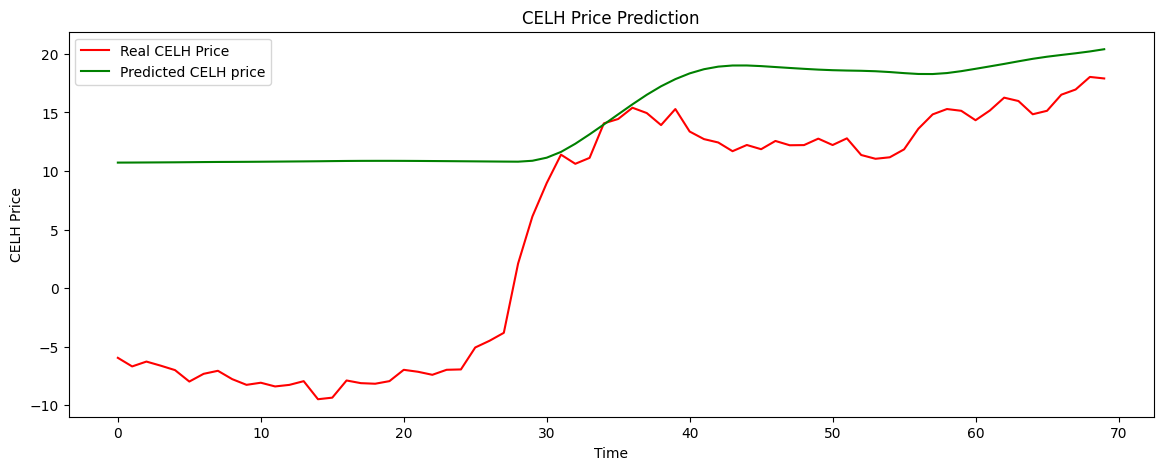

In [84]:
plt.figure(figsize = (14,5))
plt.plot(y_test[78:], color = 'red', label = 'Real CELH Price')
plt.plot(y_pred[78:], color = 'green', label = 'Predicted CELH price')
plt.title('CELH Price Prediction')
plt.xlabel('Time')
plt.ylabel('CELH Price')
plt.legend()
plt.show()

In [ ]:
for i in y_pred[1522:]:
  if y_pred[1522:] < 1.2 * y_test[1522:] & y_pred[1522:] > 0.75 * y_test[1522:]:
    print('1')
  else:
    print('0')


TypeError: ignored